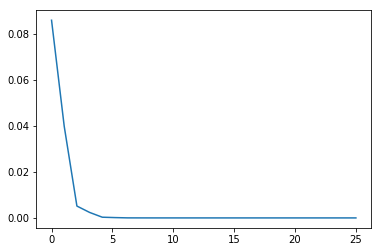

"\n    If |v' - v| = 0, then v' = v = vA\n    We've found the eigenvector for A for which the corresponding eigenvalue is 1!\n    "

In [1]:
'''
A = [[0.3, 0.6, 0.1], [0.5, 0.2, 0.3], [0.4, 0.1, 0.5]]
v = [1 / 3, 1 / 3, 1 / 3]
You can also initialize v to be random positive numbers just needs to sum to 1
Do this loop
do 25 times:
    v' = vA
    v = v'
By the 25the step you've calculated original v times A^25
On each step, plot the Euclidean distance between |v' - v| as a function of iteration
You should notice that it converges to 0
As a quiz, this about what we've just found (in terms of linear algebra)
'''

import numpy as np
import matplotlib.pyplot as plt

A = np.array([[0.3, 0.6, 0.1], [0.5, 0.2, 0.3], [0.4, 0.1, 0.5]])
    
V = np.array([0.33, 0.33, 0.34])

y = np.array([])
for x in range(0, 25):
     Vdel = V.dot(A)
     y = np.append(y, np.linalg.norm(Vdel - V))
     V = Vdel

x = np.linspace(0, 25, 25)

plt.plot(x, y)
plt.show()

'''
    If |v' - v| = 0, then v' = v = vA
    We've found the eigenvector for A for which the corresponding eigenvalue is 1!
    '''
     

mean of gaussian distribution: 1500.24624671
variance of gaussian distribution: 83.1270555025
standard deviation of gaussian distribution: 9.11740398921


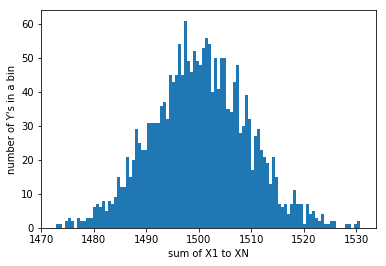

In [2]:

'''
    Demonstrate the central limit theorem (CLT)
    Recall:
    If Y = X1 + X2 + X3 + ... + XN
    where X are IID (independent, identically distributed)
    Then as N -> infinity, Y -> Gaussian distribution
    Use the uniform distribution as your base for X
    Use N = 1000 (or higher if you want)
    Then draw 1000 Y's (or more if you want)
    Plot histogram of Y's -> should be a "bell curve"
    Bonus: find the expected mean and variance of Y
    '''


import numpy as np
import matplotlib.pyplot as plt

x = np.random.rand(1000, 2000) + 1
y = np.sum(x, axis = 0)



print('mean of gaussian distribution: {0}'.format(y.mean()))
print('variance of gaussian distribution: {0}'.format(y.var()))
print('standard deviation of gaussian distribution: {0}'.format(y.std()))


plt.hist(y,bins = 100)
plt.ylabel('number of Y\'s in a bin')
plt.xlabel('sum of X1 to XN')
plt.show()


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:23: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


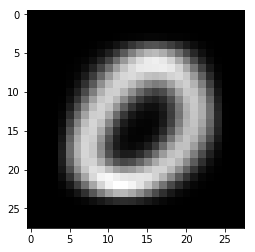

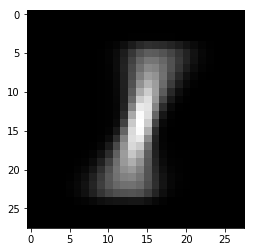

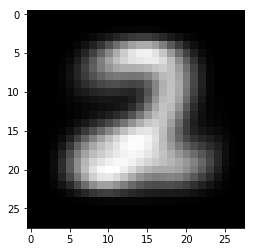

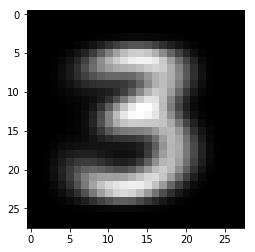

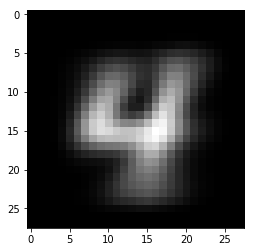

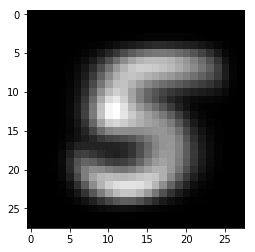

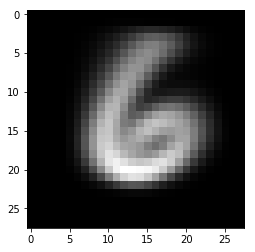

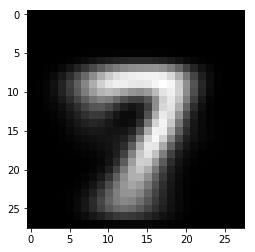

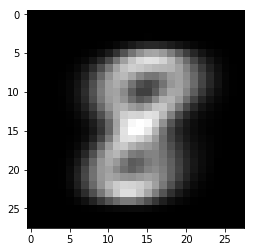

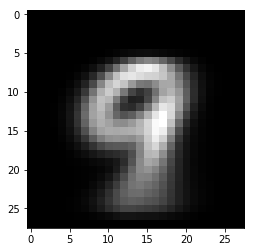

In [5]:
'''
    Load in the MNIST dataset, and plot the mean (average) image for each digit class (0....9)
    Recall: mean = sum / number of elements
'''

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

mnist_df = pd.read_csv('../train.csv')

for i in range(10):
    # get rows that is class i (picture 0 ... 9)
    class_i = mnist_df.loc[mnist_df['label'] == i]
    
    # delete 'label' column
    class_i_non_label = class_i.drop('label', axis = 1)

    # calculate mean of each column
    class_i_img = class_i_non_label.mean(axis = 0)

    # plot
    plt.imshow(class_i_img.reshape(28,28), cmap = 'gray')
    plt.show()




reading csv file...

file loaded.



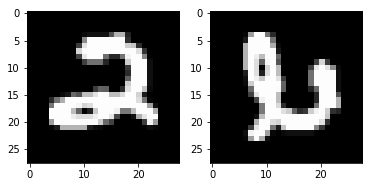

In [6]:
'''
    Continue to work with the MNIST dataset
    Common C programming exercise (with for loops and array indexing)
    Write a function that flips an image 90 degrees clockwise
    Try both the "for loop method" and by making use of Numpy functions
    '''


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import ndimage

print('reading csv file...\n')
csv_file = pd.read_csv('test.csv')
print('file loaded.\n')

imgarray = csv_file.loc[0,:].as_matrix().reshape(28,28)
#rotate_img = ndimage.rotate(imgarray, -90)
rotate_img = np.rot90(imgarray,3)

plt.subplot(1, 2, 1)
plt.imshow(imgarray, cmap = 'gray')


plt.subplot(1, 2, 2)
plt.imshow(rotate_img, cmap = 'gray')
plt.show()


In [7]:

'''
    Write a function that tests whether or not a matrix is symmetric, i.e.
    def is_symmetric(matrix):
    .....
    Try both ways: the "manual way" (i.e. by using the definition) and by making use of Numpy functions
    '''


import numpy as np



def is_symmetric(matrix):
    return np.array_equal(matrix, matrix.transpose())

a = np.array([[1, 2], [3, 4]])
b = np.array([[1, 0], [0, 1]])

print('Is matrix a symmetric? {}'.format(is_symmetric(a)))
print('Is matrix b symmetric? {}'.format(is_symmetric(b)))


Is matrix a symmetric? False
Is matrix b symmetric? True


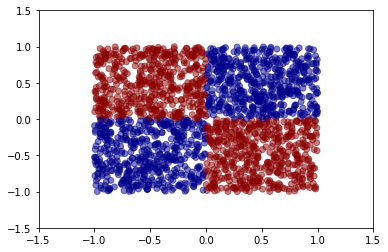

In [14]:

'''
    Generate and plot this dataset (XOR)
    Recall:
    0 XOR 0 = 0
    0 XOR 1 = 1
    1 XOR 0 = 1
    1 XOR 1 = 0
    '''


import matplotlib.pyplot as plt
import numpy as np



# set color of each point by checking its x and y value
def setColor(x, y):
    if (x < 0 and y < 0) or (x > 0 and y > 0): return 'darkblue'
    else: return 'darkred'

# uniform distribution x and y
data_x = np.random.uniform(low = -1.0, high = 1.0, size = 2000)
data_y = np.random.uniform(low = -1.0, high = 1.0, size = 2000)

# use self defined function to set color of each point
colors = list(map(setColor, data_x, data_y))


plt.scatter(data_x, data_y, c=colors, alpha = 0.5) # alpha : how much transparent
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()

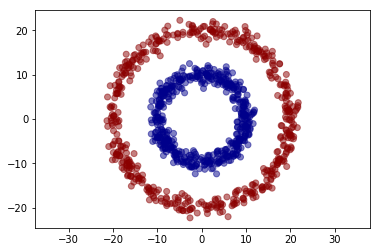

In [10]:

'''
Generate and plot this dataset (donuts/ concentric circles)

'''

import numpy as np
import matplotlib.pyplot as plt

# giving theta and r, get x and y coordinates of a point to be plot
def getCoordinates(theta, r):
    x = r * np.sin(theta)
    y = r * np.cos(theta)
    return (x, y)

N = 500

# generate float theta randomly(0 <= r < 360)
theta = np.random.random(N) * np.pi * 2

noise = np.random.normal(0, 1, N)

# generate the inside circle points, add some noise to r
inside_circle = np.asarray(getCoordinates(theta, 10 + noise))

# generate outside circle points, add some noise to r
outside_circle = np.asarray(getCoordinates(theta, 20 + noise))

# concatenate of 2D nparray, horizontally
donuts = np.concatenate((inside_circle,outside_circle),axis=1)

# generate colors array, first N elements are 'darkblue', next N elements are 'darkred'
colors = np.append(np.full(N, fill_value = 'darkblue'), np.full(N, fill_value = 'darkred'))


plt.scatter(donuts[0,:],donuts[1,:], c = colors, alpha = 0.5)
plt.axis('equal')
plt.show()


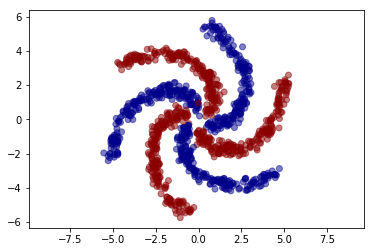

In [15]:
'''
    Generate and plot this dataset (spiral)
    
    One possibility is to parameterize radius and angel, i.e.
    
    r(t) ~ t
    0(t) ~ t
'''

import numpy as np
import matplotlib.pyplot as plt

def getCoordinates(theta, r):
    x = r * np.sin(theta)
    y = r * np.cos(theta)
    return (x, y)

N = 200

# generate random t, 0 <= t < 60
t = np.random.random(N) * 1

noise = np.random.normal(0, 0.2, 2 * N).reshape(2, N)

# generate theta and r
theta = -2 * t

k = 5
r = k * t + 0.5

# generate one spiral
spiral = np.asarray(getCoordinates(theta, r)) + noise

spirals = spiral
colors = np.full(N, fill_value = 'darkblue')

# generate all spirals and colors array
for i in range(1,6):
    spirals = np.concatenate((spirals, np.asarray(getCoordinates(theta + i * np.pi / 3, r)) + noise), axis=1)
    if i % 2 == 1:
        colors = np.append(colors, np.full(N, fill_value = 'darkred'))
    else:
        colors = np.append(colors, np.full(N, fill_value = 'darkblue'))

# plot
plt.scatter(spirals[0,:],spirals[1,:], c = colors, alpha = 0.5)
plt.axis('equal')
plt.show()
